# **Сборный проект №1**

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

## Изучение данных из файла

Для начала импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Открываем таблицу с данными:

In [2]:
df = pd.read_csv('/datasets/games.csv') 

Посмотрим, что из себя представляет наш датасет.

In [3]:
display(df.head(10))
print()
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В глаза сразу бросается некорректное оформление названий столбцов и текстовой информации в них.

Согласно легенде исследования, столбцы несут в себе следующую информацию:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными

Для начала переименуем все столбцы:

In [4]:
df = df.rename(columns={
    'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales',
    'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

И проверим, все ли удалось:

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Вроде работает. Теперь переведем всю текстовую информацию в нижний регистр для удобства:

In [6]:
cols = ['name', 'platform', 'genre', 'rating']

for col in cols:
    df[col] = df[col].str.lower()


Проверяем:

In [7]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Значительно лучше.

### Вывод

На этом этапе мы ознакомились с таблицей, чтобы получить первоначальное представление о структуре и объемах данных, а также провели переименование столбцов для соответствия правилам хорошего стиля и удобству чтения. В тех же целях мы привели к нижнему регистру остальную текстовую информацию в таблице. Теперь данные готовы к предобработке.

## Предобработка данных

Посмотрим на количество пропусков в таблице:

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

И приступим к предобработке по порядку. 

Строки с пропусками в названиях удаляем - совершенно непонятно, что это за игры. К тому же, тут получится убить двух зайцев одним ударом - пропущены еще названия жанров. 

In [9]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df.dropna(subset=['name'],inplace=True)

Теперь смотрим на пропуски в годах релиза:

In [11]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков это немало, но информация для исследования критически важная, поэтому лучше удалить, чтобы не портить картину. Если прям вот совсем серьезно браться за дело, то у некотрых игр можно добавить год релиза, лемматизировав названия - в спортивных симуляторах, например, часто указывается год выхода той или иной части.

In [12]:
df.dropna(subset=['year_of_release'],inplace=True)  # удаляем пропуски

Также сменим тип данных в столбце с годом. 

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int') 

Переходим к столбцам с оценками. Посмотрим, есть ли какие-то аномалии в оценках критиков:

In [14]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Ничего страшного и непонятного не видно. Я не буду заполнять значения NaN ничем, потому что заполнить нулями нельзя, отсутствие рейтинга не равно нулевому рейтингу, заполнять средним тоже такое себе. Пусть все остается как есть.

Теперь пройдемся по оценкам пользователей:

In [15]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
1.9       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Загадочное значение tbd означает, что отзывов у игры пока еще нет. Я решил заменить эти значения на NaN, потому что для исследования значение имеют только конкретные цифры.

In [16]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

А вот тут, кстати, интересно, нулевой рейтинг-таки есть, видимо, очень плохая игра была.

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Поменяем тип данных в столбце с оценками пользователей:

In [18]:
df['user_score'] = df['user_score'].astype('float')

Посмотрим, что у нас с рейтингами:

In [19]:
df['rating'].value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

В целом все в порядке. Чтобы не оставлять пропуски, заполню их значениями `'n/a'`

In [20]:
df['rating'] = df['rating'].fillna('n/a')

Добавим столбец с суммарными продажами:

In [21]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Уберем дубликаты:

In [22]:
df = df.drop_duplicates()

И проверим:

In [23]:
print("Количество дубликатов: {}".format(df.duplicated().sum()))

Количество дубликатов: 0


Смотрим, что получилось:

In [24]:
df.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,n/a,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,n/a,31.38


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод

В рамках предобработки данных, мы избавились от пропущенных значений в таблице. Пропущенные значения рейтинга заполнили новым значением `n/a`, потому что отсутствие рейтинга это не показатель, она может просто продаваться в регионе, где он не нужен. Также были заменены отсутствующие оценки на значение `NaN`, так как нулевая оценка не равна отсутствию оценки.  Также добавили столбец с общими продажами. Теперь можно приступать к анализу.

## Исследовательский анализ


Сначала построим гистограмму, показывающую количество продаж игр по годам релиза:

Text(0.5, 1.0, 'Распределение игр по годам релиза')

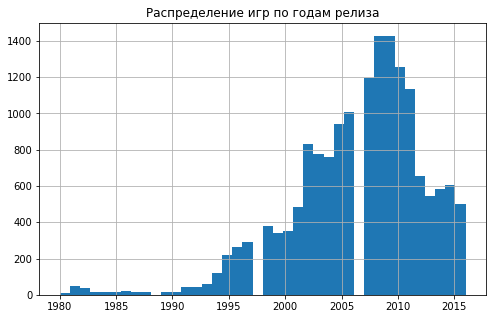

In [26]:
df['year_of_release'].hist(bins = 40, figsize = (8, 5))
plt.title('Распределение игр по годам релиза')


Я решил отбросить все данные до 1994 года. В 1994 году состоялся релиз первого поколения Sony PlayStation, которое смогло перевести игры из категории развлечения для гиков в досуг для всех - отличные игры, новое слово в графике и бешеная популярность.

In [27]:
games = df.query('year_of_release>=1994')  # отбрасываем лишнее

Посмотрим, как у нас дела с продажами по платформам:

In [28]:
platforms = games.pivot_table(index = ('platform'), values = 'total_sales', aggfunc = 'sum')

In [29]:
platforms.sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.76
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Консольщики заполонили все. Посмотрим данные по продажам основных производителей приставок, чтобы определить жизненный цикл приставки на рынке.

Text(0.5, 1.0, 'PlayStation')

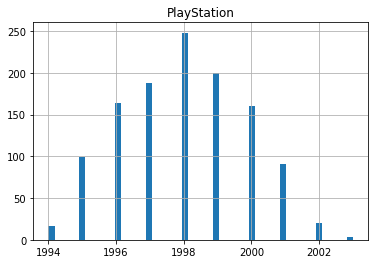

In [30]:
df[df['platform']=='ps']['year_of_release'].hist(bins = 50)
plt.title('PlayStation')

Text(0.5, 1.0, 'PlayStation 2')

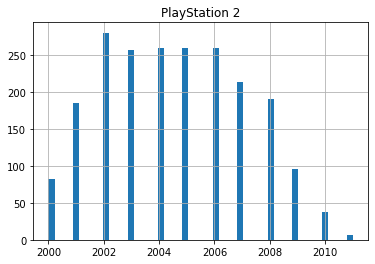

In [31]:
df[df['platform']=='ps2']['year_of_release'].hist(bins = 50)
plt.title('PlayStation 2')

Text(0.5, 1.0, 'PlayStation 3')

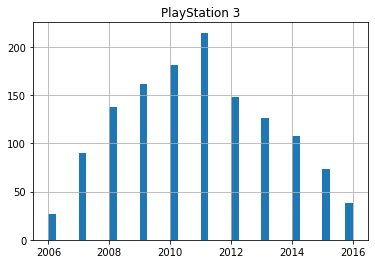

In [32]:
df[df['platform']=='ps3']['year_of_release'].hist(bins = 40)
plt.title('PlayStation 3')

Text(0.5, 1.0, 'PlayStation 4')

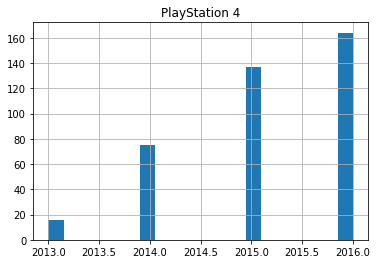

In [33]:
df[df['platform']=='ps4']['year_of_release'].hist(bins = 20)
plt.title('PlayStation 4')

Получается около десяти лет на каждое поколение приставок. Следующее поколение выводится через 5 лет после релиза предыдущего.

Также можно посмотреть, что там с мобильным геймингом:

Text(0.5, 1.0, 'PlayStation Portable')

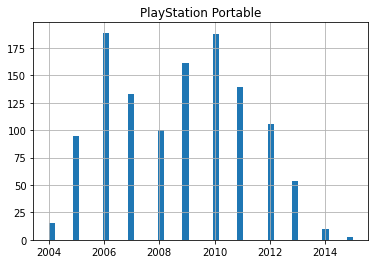

In [34]:
df[df['platform']=='psp']['year_of_release'].hist(bins = 50)  # 2009 выпуск PSP Go
plt.title('PlayStation Portable')

Посмотрим на конкурентов от Microsoft:

Text(0.5, 1.0, 'Xbox')

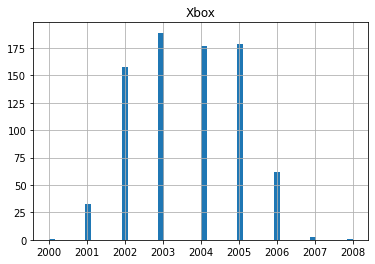

In [35]:
df[df['platform']=='xb']['year_of_release'].hist(bins = 50)
plt.title('Xbox')

Text(0.5, 1.0, 'Xbox 360')

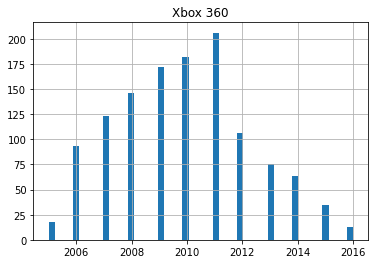

In [36]:
df[df['platform']=='x360']['year_of_release'].hist(bins = 50)
plt.title('Xbox 360')

Text(0.5, 1.0, 'Xbox One')

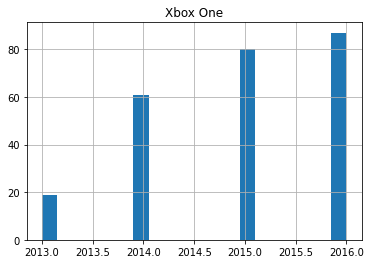

In [37]:
df[df['platform']=='xone']['year_of_release'].hist(bins = 20)
plt.title('Xbox One')

Первое поколение Xbox было не очень удачным, но, в целом, временные рамки как и конкурента.

Посмотрим на Nintendo:

Text(0.5, 1.0, 'Wii')

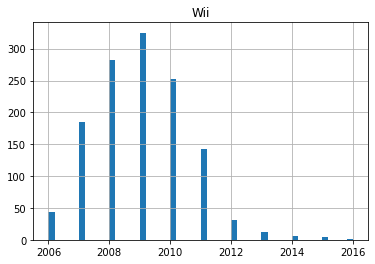

In [38]:
df[df['platform']=='wii']['year_of_release'].hist(bins = 50)
plt.title('Wii')

Text(0.5, 1.0, 'Nintendo DS')

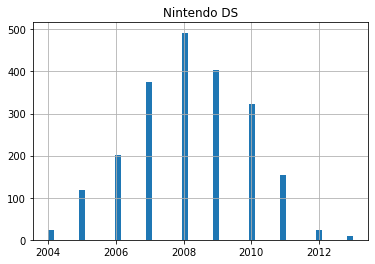

In [39]:
games[games['platform']=='ds']['year_of_release'].hist(bins = 50)
plt.title('Nintendo DS')

Text(0.5, 1.0, 'GameBoy Advanced')

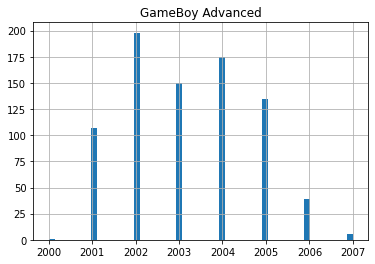

In [40]:
df[df['platform']=='gba']['year_of_release'].hist(bins = 50)
plt.title('GameBoy Advanced')

Text(0.5, 1.0, 'nintendo 3DS')

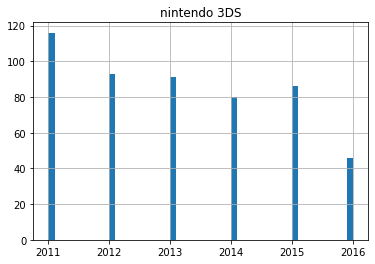

In [41]:
df[df['platform']=='3ds']['year_of_release'].hist(bins = 50)
plt.title('nintendo 3DS')

В целом, десятилетние циклы работают и здесь.

Самое интересное - игры на ПК:

Text(0.5, 1.0, 'PС')

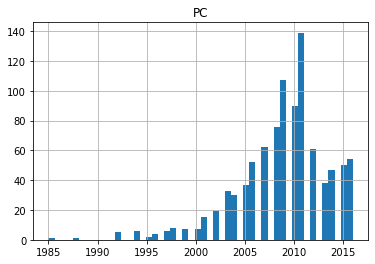

In [42]:
df[df['platform']=='pc']['year_of_release'].hist(bins = 50)
plt.title('PС')

Подъем до 2010 года, затем начинается спад. 

Впрочем, с 2013 года статистика продаж опять идет вверх.

Именно поэтому отправной точкой исследования я выбрал именно 2013 год, а также в 2013 году была выпущена PS4 и Xbox One - то есть, эти консоли подходят к пику популярности, и с большой долей вероятности еще какое-то время продажи будут высокими.

In [43]:
new_games = df.query('year_of_release>2013')  # отфильтруем еще раз по году

В качестве перспективных платформ я выбрал те, которые находятся на пике популярности: PS4, Xbox One, Nintendo 3DS - у них еще есть потенциал для роста до выхода нового поколения приставок, и ПК - продажи тоже растут, и, скорее всего, в следующем году тенденция сохранится. 

Оформим в новую таблицу:

In [44]:
platforms_new = new_games.query('platform=="ps4" or platform=="xone" or platform=="pc" or platform=="3ds"')

In [45]:
platforms_new.head(5) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,n/a,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,n/a,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,n/a,7.98


Поосмотрим, как продаются наши теоретически перспективные платформы:

In [46]:
platforms_new_sales = platforms_new.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
platforms_new_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
pc,27.05


PS4 определенно на коне!

Теперь посмотрим, что у нас с выбросами для перспективных платформ:

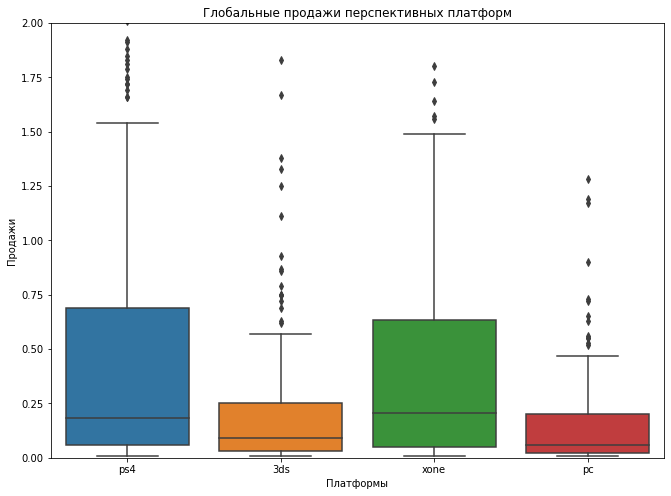

In [47]:
import seaborn as sns

plt.figure(figsize=(11,8))
sns.boxplot(x='platform', y='total_sales',  data=platforms_new, notch=False)
plt.title('Глобальные продажи перспективных платформ')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(0, 2)
plt.show()

На выходе мы получаем следующую картину:

* для ведущих приставок PS4/Xbox One границы нормального распределения почти одинаковые - до 1,5 млн копий, но у PS4 гораздо чаще бывают еще более высокие продажи - я думаю, это происходит за счет обширного набора эксклюзивных игр с большой аудиторией фанатов;
* продажи Nintendo 3DS  и РС также показывают близкие границы в районе 500 тыс. проданных копий. Но и выбросов намного больше - иногда по количеству проданных копий игр она даже догоняет серьезных конкурентов в лице PS4 и Xbox. Я думаю, это можно объяснить разнообразием игр на мобильной платформе. А еще они проще и их много, рассчитанных на широкий охват. 

Я буду рассматривать платформу ПК, как наиболее близкую мне. 

In [49]:
pc_games = df.query('platform=="pc"')  # делаем отдельную таблицу

Избавимся от пропущенных значений в столбцах с оценками для чистоты эксперимента.

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
pc_games.dropna(subset=['critic_score'],inplace=True)


In [52]:
pc_games.dropna(subset=['user_score'],inplace=True)

Никаких пропусков, типа данных корректный, можно анализировать.

In [53]:
pc_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             688 non-null    object 
 1   platform         688 non-null    object 
 2   year_of_release  688 non-null    int64  
 3   genre            688 non-null    object 
 4   na_sales         688 non-null    float64
 5   eu_sales         688 non-null    float64
 6   jp_sales         688 non-null    float64
 7   other_sales      688 non-null    float64
 8   critic_score     688 non-null    float64
 9   user_score       688 non-null    float64
 10  rating           688 non-null    object 
 11  total_sales      688 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 69.9+ KB


Посмотрим, как соотносятся наличие отзывов от критиков и продажи:

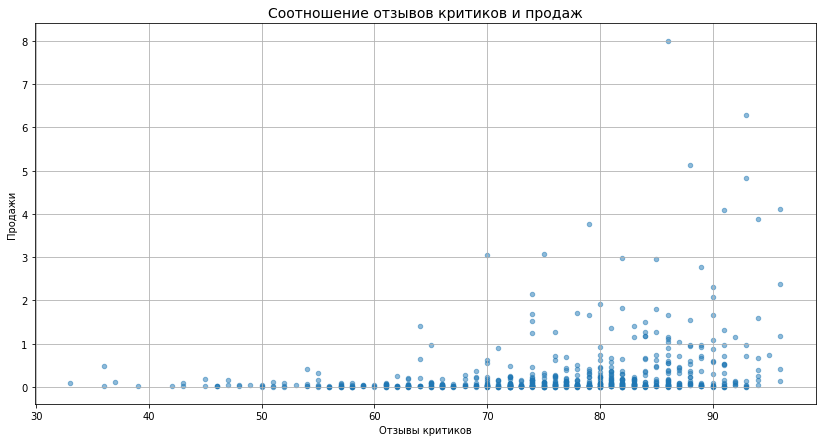

In [54]:
pc_games.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.5)
plt.title('Соотношение отзывов критиков и продаж', size=14)
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

In [55]:
print('Соотношение отзывов критиков и продаж: {}.'.format(pc_games['critic_score'].corr(pc_games['total_sales'])))

Соотношение отзывов критиков и продаж: 0.257260981042733.


Неожиданно, но почти никак. Видимо, критики тоже люди и им свойственно ошибаться.

Посмотрим, как обстоят дела с другими популярными платформами:

In [56]:
ps4_games = df.query('platform=="ps4"')
print('Соотношение отзывов критиков и продаж PS4: {}.'.format(ps4_games['critic_score'].corr(ps4_games['total_sales'])))

Соотношение отзывов критиков и продаж PS4: 0.40656790206178095.


In [57]:
xone_games = df.query('platform=="xone"')
print('Соотношение отзывов критиков и продаж Xbox One: {}.'.format(xone_games['critic_score'].corr(xone_games['total_sales'])))

Соотношение отзывов критиков и продаж Xbox One: 0.4169983280084017.


In [58]:
ds_games = df.query('platform=="3ds"')
print('Соотношение отзывов критиков и продаж Nintendo 3DS: {}.'.format(ds_games['critic_score'].corr(ds_games['total_sales'])))

Соотношение отзывов критиков и продаж Nintendo 3DS: 0.3487397305984834.


И на других популярных платформах зависимость тоже весьма слабая, хотя и выше, чем с ПК.

А как соотносятся отзывы игроков с продажами?

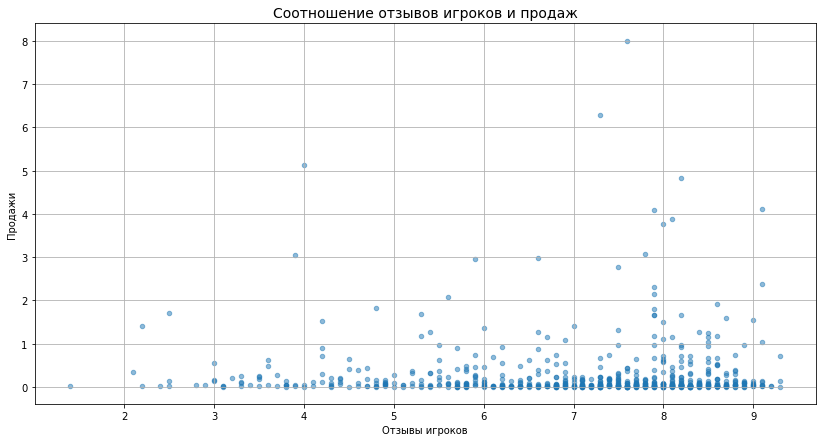

In [59]:
pc_games.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.5)
plt.title('Соотношение отзывов игроков и продаж', size=14)
plt.xlabel('Отзывы игроков')
plt.ylabel('Продажи')
plt.show()

In [60]:
print('Соотношение отзывов игроков и продаж: {}.'.format(pc_games['user_score'].corr(pc_games['total_sales'])))

Соотношение отзывов игроков и продаж: 0.0035962323378451056.


Соотносятся чуть меньше, чем никак. Но, справедливости ради, стоит заметить, что в диаграмме с отзывами критиков в правой части больше выбросов с большим количеством проданных копий игры. Видимо, за счет большого опыта критики иногда могут предсказать успех той или иной игры.

In [61]:
print('Соотношение отзывов критиков и продаж PS4: {}.'.format(ps4_games['user_score'].corr(ps4_games['total_sales'])))

Соотношение отзывов критиков и продаж PS4: -0.031957110204556376.


In [62]:
print('Соотношение отзывов критиков и продаж Xbox One: {}.'.format(xone_games['user_score'].corr(xone_games['total_sales'])))

Соотношение отзывов критиков и продаж Xbox One: -0.06892505328279414.


In [63]:
print('Соотношение отзывов критиков и продаж Nintendo 3DS: {}.'.format(ds_games['user_score'].corr(ds_games['total_sales'])))

Соотношение отзывов критиков и продаж Nintendo 3DS: 0.22207843643390882.


Теперь посмотрим, игры каких жанров пользуются наибольшей популярностью у игроков:

In [64]:
genre_sales = new_games.pivot_table(index = 'genre', values = ('total_sales'), aggfunc = 'mean')
genre_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
shooter,1.335469
sports,0.680000
platform,0.476053
fighting,0.470333
role-playing,0.459005
racing,0.398841
misc,0.332301
action,0.322068
simulation,0.298409


С большим отрывом лидируют игры жанров `shooter`/`sports`. На третьем месте спортивные платформеры, очень близко подобрались файтинги и ролевые игры. Видимо, людям нравится динамичный игровой процесс. Ну или что-то, чтобы просто отвлечься, или представить себя в роли другого человека(или не совсем человека, если мы про ролевые игры). 

Хуже всего дела обстоят у головоломок и стратегий - запрос на игры, требующие больших усилий и концентрации падает.

Но это актуально для новых игр. Можно сравнить с глобальной картиной, чтобы понять, меняются ли тренды со временем:

In [65]:
total_genre_sales = df.pivot_table(index = 'genre', values = ('total_sales'), aggfunc = 'mean')  # сделаем такую же таблицу, но за все время
total_genre_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
platform,0.940262
shooter,0.803519
role-playing,0.628683
racing,0.590122
sports,0.567940
fighting,0.528865
action,0.519057
misc,0.459204
simulation,0.452695


Я думаю, первое место платформеров обусловлено тем, что они были популярны на первых игровых приставках и РС. Вспомнить хотя бы Марио и Принца Персии. Но шутеры быстро все наверстали. Но стратегии и головоломки все же лучше не разрабатывать, очень нишевая вещь)) 


Каких-то выбросов по жанровым продажам не наблюдается, все укладывается в нормальные рамки.

Text(0.5, 1.0, 'Продажи по жанрам')

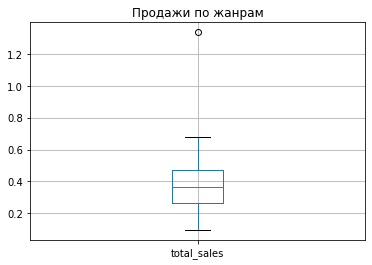

In [66]:
genre_sales.boxplot()
plt.title('Продажи по жанрам')

###  Вывод

Цикл жизни игровой приставки составляет около 10 лет, новое поколение игровых платформ выходит примерно раз в 5 лет (кроме ПК). Наличие отзывов игроков и критиков слабо связано с объемами продаж. Популярность жанров с течением времени измеилась слабо. Самый прибыльный жанр в текущих реалиях это `shooter`. Людям нравится изничтожать кого-то.

## Особенности региональных продаж

Теперь посмотрим, как на продажи влияет география.

Ниже рейтинг по продажам в Северной Америке с сортировкой по платформам:

In [67]:
na_platforms = new_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
display(na_platforms.sort_values(by = 'na_sales', ascending=False).head(5))


,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


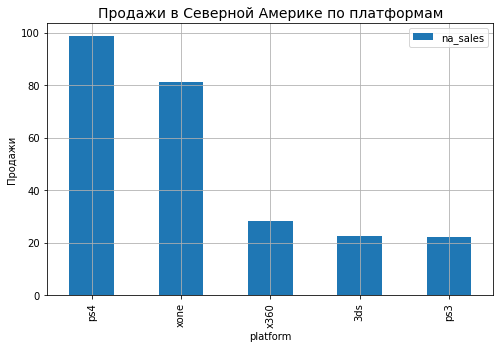

In [68]:
na_platforms.sort_values(by = 'na_sales', ascending=False).head(5).plot(kind = 'bar', grid = True, figsize = (8, 5))
plt.title('Продажи в Северной Америке по платформам', size=14)
plt.ylabel('Продажи')
plt.show()

Топ-5 оккупирован приставками. В том числе, немало и мобильных геймеров - Nintendo 3DS на 4 месте. Но суммарные продажи с 3 по 5 место не дотягивают до 1 или 2 по отдельности.

Посмотрим, в какие игры чаще всего играют:

In [69]:
na_genres = new_games.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
display(na_genres.sort_values(by = 'na_sales', ascending=False).head(5))


,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


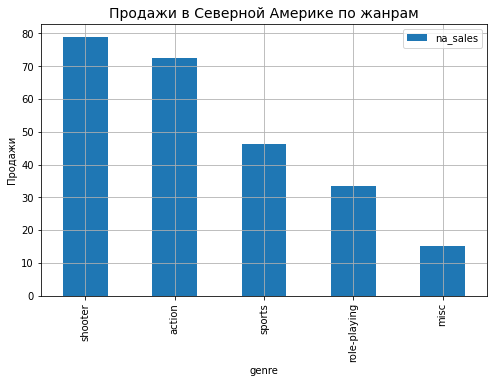

In [70]:
na_genres.sort_values(by = 'na_sales', ascending=False).head(5).plot(kind = 'bar', grid = True, figsize = (8, 5))
plt.title('Продажи в Северной Америке по жанрам', size=14)
plt.ylabel('Продажи')
plt.show()

Полное совпадение с глобальным рейтингом.

Смотрим на геймеров из Европы:

In [71]:
eu_platforms = new_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
display(eu_platforms.sort_values(by = 'eu_sales', ascending=False).head(5))


,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


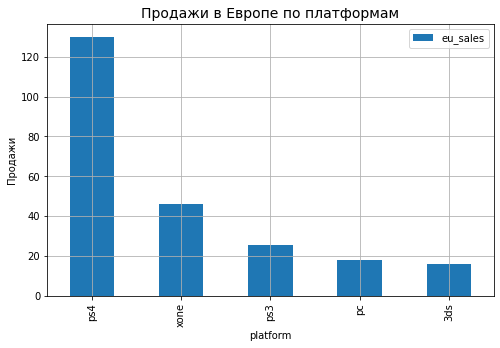

In [72]:
eu_platforms.sort_values(by = 'eu_sales', ascending=False).head(5).plot(kind = 'bar', grid = True, figsize = (8, 5))
plt.title('Продажи в Европе по платформам', size=14)
plt.ylabel('Продажи')
plt.show()

С огромным перевесом лидирует PS4 - больше, чем все остальные участники топ-5 вместе взятые! Ближе везти из Японии? Агрессивный маркетинг? Непонятное. 

Что по жанрам?

In [73]:
eu_genres = new_games.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
display(eu_genres.sort_values(by = 'eu_sales', ascending=False).head(5))


,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


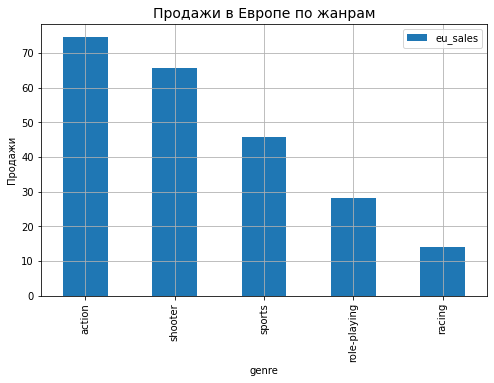

In [74]:
eu_genres.sort_values(by = 'eu_sales', ascending=False).head(5).plot(kind = 'bar', grid = True, figsize = (8, 5))
plt.title('Продажи в Европе по жанрам', size=14)
plt.ylabel('Продажи')
plt.show()

Неожиданно в топ-5 врываются гоночные симуляторы. Вероятно, сказывается богатая история автоспорта и высокая концентрация гоночных трасс.

Удивят ли нас геймеры из Японии?

In [75]:
jp_platforms = new_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
display(jp_platforms.sort_values(by = 'jp_sales', ascending=False).head(5))


,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


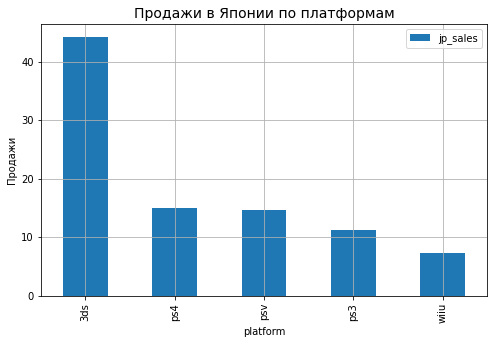

In [76]:
jp_platforms.sort_values(by = 'jp_sales', ascending=False).head(5).plot(kind = 'bar', grid = True, figsize = (8, 5))
plt.title('Продажи в Японии по платформам', size=14)
plt.ylabel('Продажи')
plt.show()

Удивят. Три позиции из пяти это мобильные игровые платформы. Причем, опять же, продажи на Nintendo 3DS практически равны сумме продаж на остальных платформах.

In [77]:
jp_genres = new_games.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
display(jp_genres.sort_values(by = 'jp_sales', ascending=False).head(5))


,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


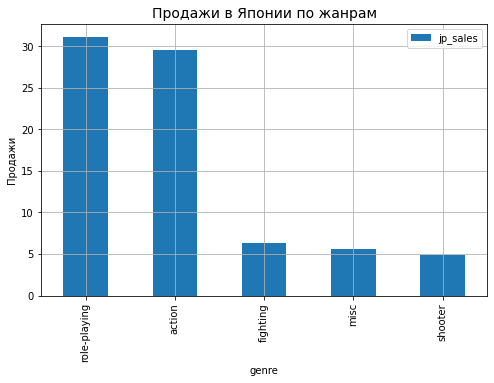

In [78]:
jp_genres.sort_values(by = 'jp_sales', ascending=False).head(5).plot(kind = 'bar', grid = True, figsize = (8, 5))
plt.title('Продажи в Японии по жанрам', size=14)
plt.ylabel('Продажи')
plt.show()

И по жанрам тоже удивят - первое место по популярности занимают ролевые игры! Также в тройку просочились файтинги.

Посмотрим на продажи игр в зависимоти от рейтинга ESRB:

In [79]:
total_rating = new_games.pivot_table(index = 'rating', values = ('na_sales', 'eu_sales', 'jp_sales'), aggfunc = 'sum')
total_rating

,eu_sales,jp_sales,na_sales
rating,,,
e,58.06,8.94,50.74
e10+,26.16,4.46,33.23
m,93.44,8.01,96.42
n/a,58.95,56.90,64.72
t,34.07,14.78,38.95


Посмотрим на продажи игр с присвоенным рейтингом:

In [80]:
temp = total_rating.query('rating!="n/a"')[['eu_sales', 'na_sales', 'jp_sales']].sum()  # тиблица чисто в технических целях
temp_sales = temp.to_frame(name='rated_sales').reset_index()
temp_sales

,index,rated_sales
0,eu_sales,211.73
1,na_sales,219.34
2,jp_sales,36.19


Впечатляет, но сколько игр без рейтинга было продано?

In [81]:
eu = total_rating.query('rating=="n/a"')['eu_sales'].sum()  # суммируем безрейтинговые продажи

In [82]:
na = total_rating.query('rating=="n/a"')['na_sales'].sum()  # суммируем безрейтинговые продажи


In [83]:
jp = total_rating.query('rating=="n/a"')['jp_sales'].sum()  # суммируем безрейтинговые продажи


In [84]:
nonrated = [eu, na, jp]  # сделаем список

Мы видим, что игры без рейтинга лучше продаются только в Японии. Но я думаю, что это связано с тем, что ESRB это американское рейтинговое агентство, и игры для американского/европейского рынков разрабатываются плюс-минус одними и теми же студиями, и рейтинг часто получают, чтобы продвинуть продажи в США, а в Европе он идет как сопутствующий фактор.

Япония же, как мы видели, весьма специфический рынок, и американские рейтинги им не особо нужны, под мобильные платформы разрабатывают игры в основном местные студии.

In [85]:
temp_sales['non_rated_sales'] = nonrated
temp_sales

,index,rated_sales,non_rated_sales
0,eu_sales,211.73,58.95
1,na_sales,219.34,64.72
2,jp_sales,36.19,56.90


Да, корреляция заметная, но я считаю, что она обсулавливается вышесказанными причинами.

In [86]:
temp_sales['rated_sales'].corr(temp_sales['non_rated_sales'])

0.728335706637137

### Вывод

Американский и европейский рынки во многом похожи - доминируют приставки, только в Европе на 4 месте расположился РС. Много студий и сильная компьютеризация? Сильно выделяется Япония - популярны мобильные платформы. 

Также в Европе и Америке люят играть в штуеры, спортивные игры и экшены. В Японии уверенно лидируют ролевые игры, экшены и файтинги.

Рейтинг ESRB в Японии не имеет значения, вероятно, в силу географии. В других странах продажи с ним выше.

## Проверка гипотез

Итак, проверим гипотезы:

Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [87]:
from scipy import stats as st  # импорт библиотеки

Формируем материал для анализа:

In [88]:
xone = new_games.query('platform == "xone"')
xone_rate = xone['user_score'].dropna()


In [89]:
pc = new_games.query('platform == "pc"')
pc_rate = pc['user_score'].dropna()

In [90]:
alpha = .05
results = st.ttest_ind(xone_rate, pc_rate)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Оказывается, да, рейтинги различаются незначительно. Может быть, приставочники тоже люди, надо будет присмотреться=)

In [91]:
print(f'Средний пользовательский рейтинг на X-box One: {xone_rate.mean()}')



Средний пользовательский рейтинг на X-box One: 6.594545454545456


In [92]:
print(f'Средний пользовательский рейтинг на PC: {pc_rate.mean()}')

Средний пользовательский рейтинг на PC: 6.298360655737705


Теперь проверим гипотезы по жанровым предпочтениям:

Н0 - Средние пользовательские рейтинги игр жанров Action и Sports равные

Н1 - Средние пользовательские рейтинги игр жанров Action и Sports не равные

Формируем материал для анализа:

In [93]:
action = new_games.query('genre == "action"')
action_rate = action['user_score'].dropna()

In [94]:
sports = new_games.query('genre == "sports"')
sports_rate = sports['user_score'].dropna()

In [95]:
results = st.ttest_ind(action_rate, sports_rate)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


А вот рейтинги по жанрам отличаются - геймеры чаще недовольны спортивными симуляторами. 

In [96]:
print(f'Средний пользовательский рейтинг игр жанра Action: {action_rate.mean()}')

Средний пользовательский рейтинг игр жанра Action: 6.760606060606061


In [97]:
print(f'Средний пользовательский рейтинг игр жанра Sports: {sports_rate.mean()}')

Средний пользовательский рейтинг игр жанра Sports: 5.2251968503937


###  Вывод

Средние рейтинги платформ Xbox One и PC примерно равны.

Средние рейтинги игра жанров Action и Sports не равны, спортивные симуляторы чаще получают негативные оценки.

# 6 Общий вывод

В рамках исследования была проведена достаточно масштабная работа, а именно:

* мы провели переименование столбцов для соответствия правилам хорошего стиля и удобства, и привели к нижнему регистру текстовую информацию в таблице

* в рамках предобработки данных мы избавились от пропущенных значений в таблице. Пропущенные значения рейтинга заполнили новым значением `n/a`, также были заменены отсутствующие оценки на значение `NaN`, так как нулевая оценка не равна отсутствию оценки.

* добавили столбец с общими продажами

* мы увидели, что цикл жизни игровой приставки составляет около 10 лет, новое поколение игровых платформ выходит примерно раз в 5 лет (кроме ПК) 

* наличие отзывов игроков и критиков слабо связано с объемами продаж. 

* популярность жанров с течением времени изменилась слабо. 

* самый прибыльный жанр в текущих реалиях это `shooter`. 

* американский и европейский рынки во многом похожи - доминируют приставки, только в Европе на 4 месте расположился РС. Сильно выделяется Япония - популярны мобильные платформы. 

* в Европе и Америке люят играть в штуеры, спортивные игры и экшены. В Японии уверенно лидируют ролевые игры, экшены и файтинги.

* рейтинг ESRB в Японии не имеет значения, вероятно, в силу географии. В других странах продажи с ним выше.

* средние рейтинги платформ Xbox One и PC равны.

* средние рейтинги игра жанров Action и Sports не равны, спортивные симуляторы чаще получают негативные оценки.

На основании этой информации можно предположить, что стоит провести рекламные кампании выходящих на приставках игр в жанрах `shooter`, '`sports`, `role-playing`, `action`. С высокой вероятностью они будут пользоваться популярностью во всех регионах. Если планируются продажи не в Японии, стоит озаботиться получением рейтинга ESRB. 